# Bank Loan Approval Prediction
### By Akash Mane

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
#Load Dataset
df = pd.read_csv("dataset.csv")

In [3]:
#LETS TAKE A PEAK AT THE DATA
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# number of rows and columns
df.shape

(614, 13)

In [5]:
# Statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# number of missing values from dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# dropping missing values from dataset
df = df.dropna()

In [8]:
# label encoding
df.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

In [9]:
# printing first 5 rows of dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [10]:
# dependent column values
df["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [11]:
# Lets replace 3+ to 4 
df = df.replace(to_replace='3+', value=4)

In [12]:
df["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Data visualization

<Axes: xlabel='Dependents', ylabel='count'>

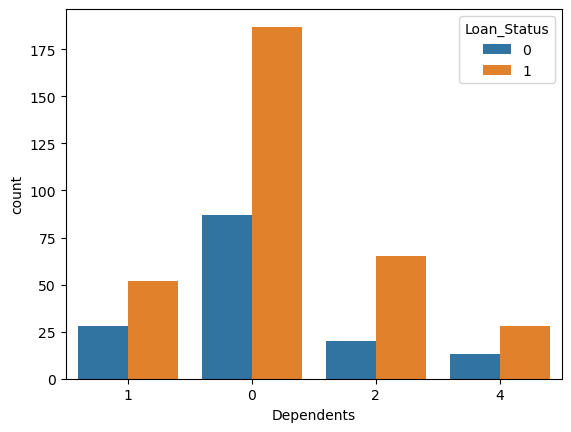

In [13]:
import seaborn as sns
sns.countplot(x='Dependents',hue="Loan_Status",data=df)

<Axes: xlabel='Gender', ylabel='count'>

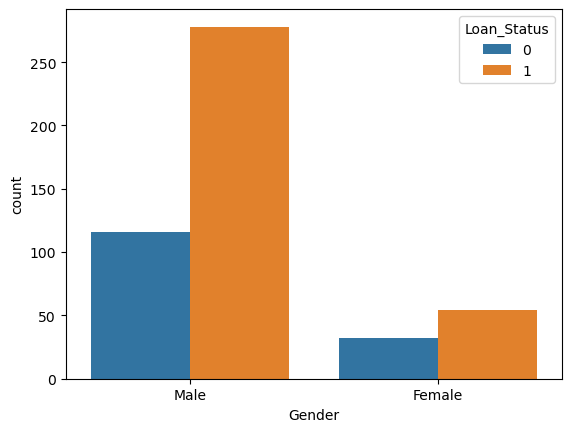

In [14]:
sns.countplot(x='Gender',hue="Loan_Status",data=df)

<Axes: xlabel='Married', ylabel='count'>

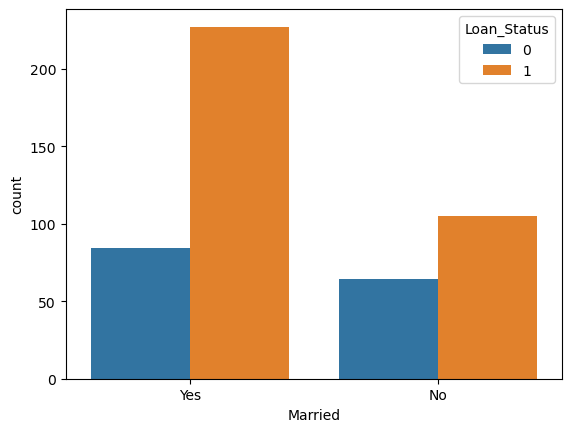

In [15]:
sns.countplot(x='Married',hue="Loan_Status",data=df)

<Axes: xlabel='Education', ylabel='count'>

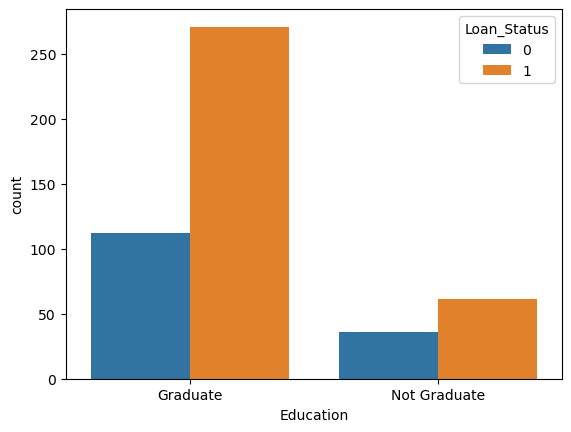

In [16]:
sns.countplot(x='Education',hue="Loan_Status",data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

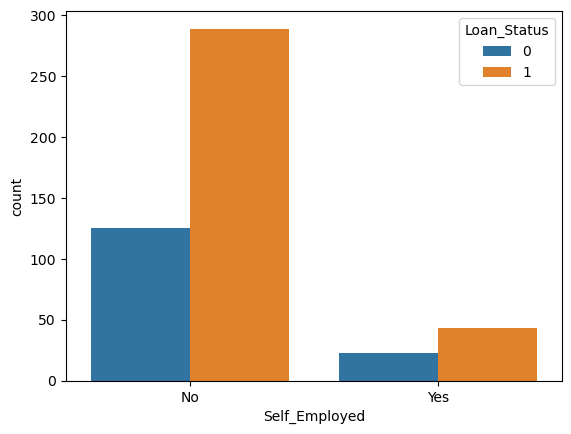

In [17]:
sns.countplot(x='Self_Employed',hue="Loan_Status",data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

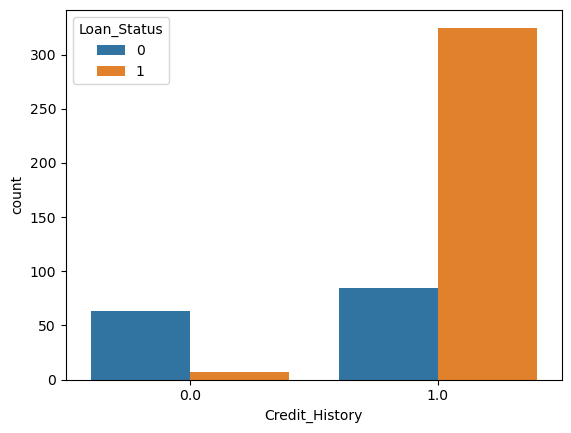

In [18]:
sns.countplot(x='Credit_History',hue="Loan_Status",data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

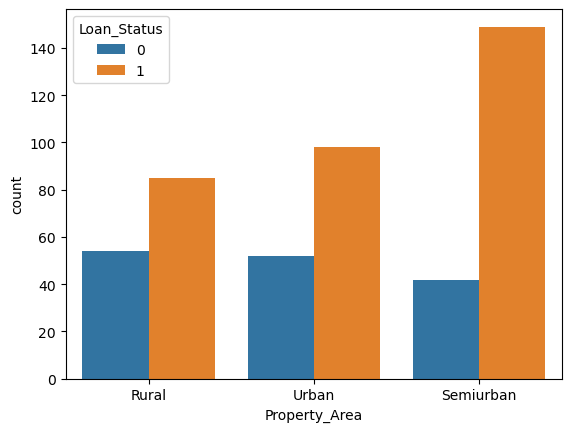

In [19]:
sns.countplot(x='Property_Area',hue="Loan_Status",data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

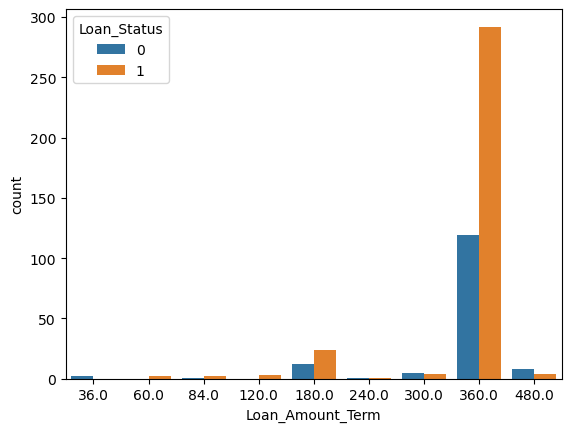

In [20]:
sns.countplot(x='Loan_Amount_Term',hue="Loan_Status",data=df)

# FROM ABOVE OBSERVATION WE KNOW THAT


1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men than Women (approx. 3x)
3. Martial Status: 2/3rd of the population in the dataset is Marred;
4. Dependents: Majority of the population have zero dependents and are  also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval 
6. Employment: 5/6th of population is not self employed. 
7. Property Area: More applicants from Semi-urban and also likely to be granted loans. 
8. Applicant with credit history are far more likely to be accepted.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years

In [21]:
# Convert catagorical columns to numeric values
df.replace({'Gender':{'Male':1,'Female':0}, 'Education':{'Graduate':1,'Not Graduate':0}, 'Married': {'Yes':1,'No':0},
                'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}}, inplace= True)

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [23]:
# Seperating Data and Label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']           

In [24]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

### Train test split

In [25]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


### Training the model :
#### 1)Suport vector machine model

In [27]:
classifier = svm.SVC(kernel='linear')

In [28]:
# Train support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### Model Evaluation

In [29]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [30]:
print('accuracy on training data :',training_data_accuracy )

accuracy on training data : 0.7708333333333334


In [31]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [32]:
print('accuracy on test data :',test_data_accuracy )

accuracy on test data : 0.8125


#### 2) Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,Y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(Y_train,y_pred))
print("Train Accuracy ", accuracy_score(Y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,Y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,Y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8750000000000001
Train Accuracy  0.8055555555555556
Validation Mean F1 Score:  0.7075677846860738
Validation Mean Accuracy:  0.8009623095429029


In [46]:
y_pred = rf_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(Y_test,y_pred))
print("Test F1 Score: ",f1_score(Y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8333333333333334
Test F1 Score:  0.8857142857142858
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,9,6,15
1,2,31,33
All,11,37,48


#### 2) Logistic Regression

<Axes: xlabel='Decision Threshold', ylabel='Values'>

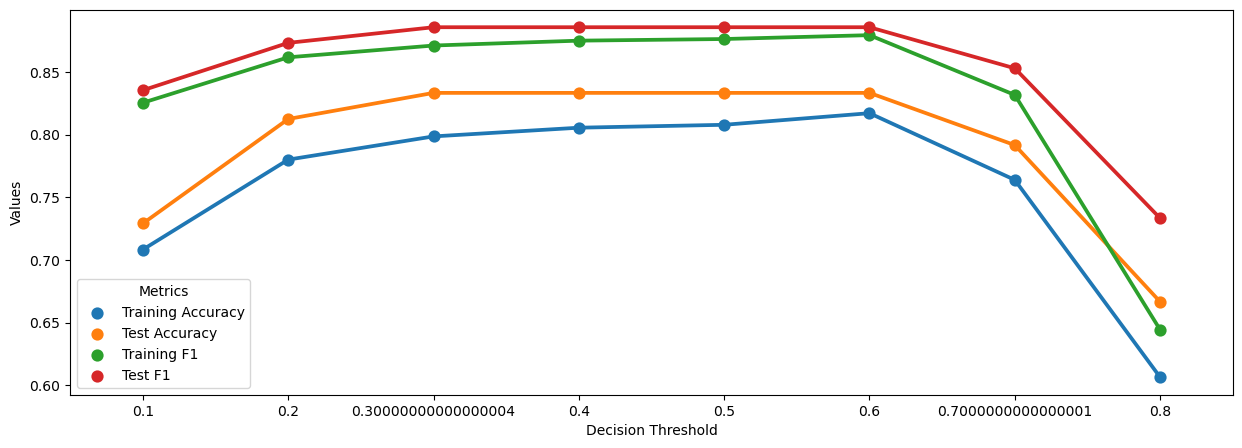

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,Y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(Y_train,y_pred_train)
    train_f1 = f1_score(Y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(Y_test,y_pred_test)
    test_f1 = f1_score(Y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [50]:
thresh = 0.4 #TAKEN BY REFERENCE OF ABOVE PLOI
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(Y_test,y_pred))
print("Test F1 Score: ",f1_score(Y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8333333333333334
Test F1 Score:  0.8857142857142858
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,9,6,15
1,2,31,33
All,11,37,48


WE KNOW THAT LOGISTIC REGRESSION HAS HIGHEST ACCURACY
BUT LETS VERIFY BY CHECKING THE ACCURACY BY  KVN SEPERATL

In [51]:
#APPLYING KNN 
from sklearn.neighbors import KNeighborsClassifier
my_model = KNeighborsClassifier(n_neighbors=1)
result = my_model.fit(X_train,Y_train)

In [52]:
predictions = result.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))

Accuracy: 0.6666666666666666


### HENCE FROM ABOVE OBSERVATION WE HAVE ACCURACY OF DECISION TREE AND RANDOM FOREST ARE SAME & ACCURACY OF SVM AND KNN ARE LOW

### BUT THE ACCURACY OF LOGISTIC REGRESSION IS MOST HIGH
## HENCE
#  **!!LOGISTIC!!** **!!REGRESSION!!** IS BEST